In [2]:
import pandas as pd


In [10]:
df = pd.read_csv('/content/sample_data/HR_comma_sep_small.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
3595,0.32,0.97,6,272,2,0,0,0,sales,low
3596,0.48,0.50,4,173,3,0,0,0,sales,low
3597,0.62,0.42,2,124,2,0,0,0,sales,low
3598,0.77,0.86,5,282,4,0,0,0,sales,low


In [4]:
#Get all Categorical features
categorical_features = [features for features in df.columns if df[features].dtypes == 'O']
categorical_features

['Department', 'salary']

In [14]:
#len(df)
dataset = df.copy()
df_left = df.loc[df['left'] == 1]
df_retained = df.loc[df['left'] == 0]

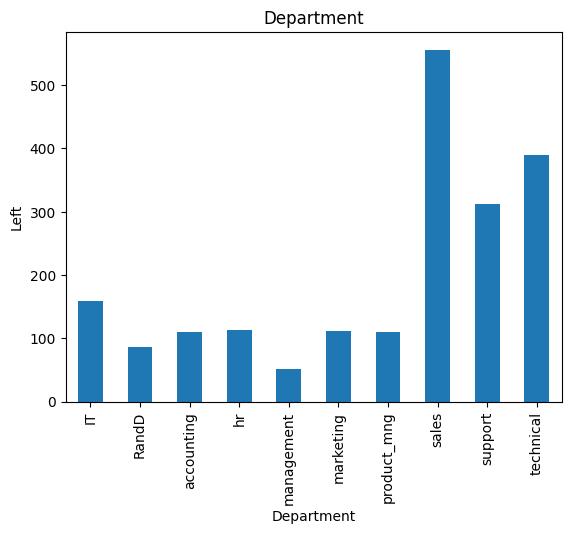

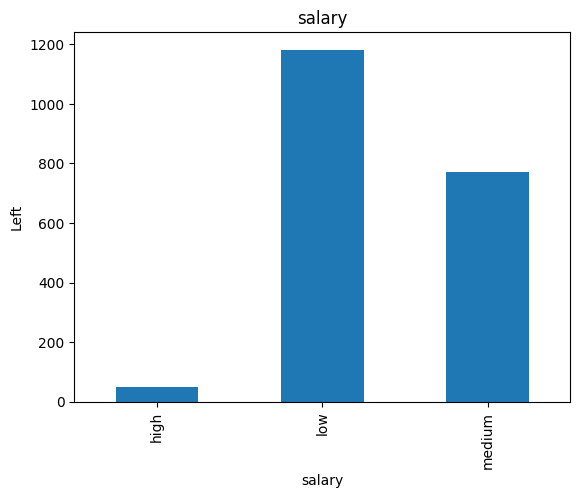

In [18]:
from matplotlib import pyplot as plt

for feature in categorical_features:
  data=dataset.copy()
  df_left.groupby(feature)['left'].agg('count').plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Left')
  plt.title(feature)
  plt.show()

In [29]:
#convert categorical features to Numbers
# Use get_dummies()  to convert Department & salary
dummies = pd.get_dummies(df[['Department','salary']],dtype=int)
dummies
dataset = df.copy()
merged = pd.concat([dataset,dummies],axis='columns')
merged
#Now Drop 'sales' column to avoid Dummy Trap and Actual column 'Department' which is not needed now.
#merged = merged.drop(['Department_sales','Department','salary','salary_low'],axis='columns')
#merged
#from matplotlib import pyplot as plt
#plt.scatter(merged['left'],merged['salary_low'])
#plt.xlabel('Left')
#plt.ylabel('Salary Low')
X_train = merged.drop(['left','Department','salary'], axis = 'columns')

In [30]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0.32,0.97,6,272,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3596,0.48,0.50,4,173,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3597,0.62,0.42,2,124,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3598,0.77,0.86,5,282,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [31]:
y_train = merged['left']
y_train

,left
0,1
1,1
2,1
3,1
4,1
...,...
3595,0
3596,0
3597,0
3598,0


# Identifying the Columns those influence Employee Retention i.e 'left' Column using **Lasso Regression**

In [32]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [33]:
feature_sel_model.get_support()

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False])

In [36]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print('Total features {}'.format(len(X_train.columns)))
print('Selected features {}'.format(len(selected_feat)))

Total features 20
Selected features 6


In [37]:
selected_feat

Index(['satisfaction_level', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'salary_low'],
      dtype='object')

In [42]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0.32,0.97,6,272,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3596,0.48,0.50,4,173,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3597,0.62,0.42,2,124,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3598,0.77,0.86,5,282,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## Another approach to Idenfify the columns those have direct Impact on Employee Retention i.e 'left' Column

In [51]:
import pandas as pd
df_new = pd.read_csv('/content/sample_data/HR_comma_sep.csv')
df_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [53]:
left = df_new[df_new.left==1]
left.shape
retained = df_new[df_new.left==0]
retained.shape

(11428, 10)

In [56]:
numerical_features = [features for features in df_new.columns if df_new[features].dtype != 'O']
numerical_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [57]:
df_new[numerical_features]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [58]:
df[numerical_features].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.668106,0.717569,3.8125,197.90125,3.096875,0.171875,0.000
1,0.439955,0.721015,3.8770,207.91400,3.878000,0.052500,0.004


From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**time_spend_company**: Employees who spent more time at firm </li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

**Impact of salary on employee retention**

<Axes: xlabel='salary'>

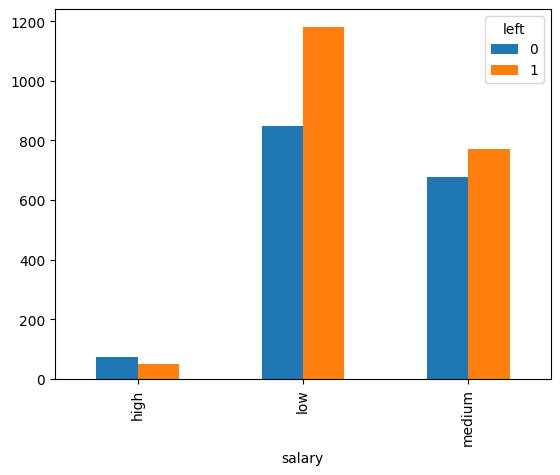

In [59]:
pd.crosstab(df_new.salary,df['left']).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

<Axes: xlabel='Department'>

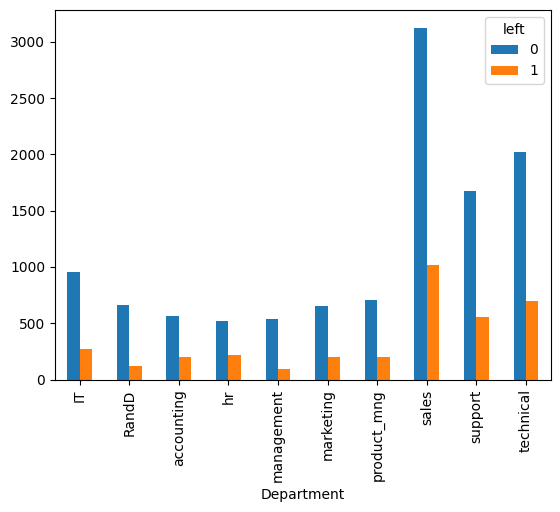

In [60]:
pd.crosstab(df_new.Department,df_new.left).plot.bar()

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
    <li>**time_spend_company**</li>
</ol>

But Ignoring 'time_spend_company' as it looks similar as 'Average Monthly Hours' and reduces the Score.

In [96]:
subdf = df_new[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


**Tackle salary dummy variable**

In [97]:
salary_dummies = pd.get_dummies(df_new.salary, prefix='salary', dtype='int')
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [98]:
merged_df = pd.concat([subdf,salary_dummies],axis='columns').drop('salary',axis='columns')
merged_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [99]:
y = df_new.left
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_df,y,test_size=0.3)

In [101]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression( max_iter=1000)


In [102]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [103]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [104]:
model.score(X_test,y_test)

0.7782222222222223

### Lets implement Linear Regression and calculate the score.

In [105]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [106]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [107]:
lin_model.predict(X_test)

array([ 0.43915843,  0.56089931,  0.00166072, ..., -0.11959511,
        0.08846999,  0.02903262])

In [108]:
lin_model.score(X_test,y_test)

0.18129706632334297

## Score of Linear Regression is not good when compared with Ligistic Regression. So Logistic Regression is the right choice.
